<font size = 6><b> PFE </b></font>

Adds

--

<font size = 4><b> Imports</b></font>

--

In [4]:
import os
import pandas

# on se crée une liste d'adresses disques contenant les vidéos
listeAdresse = ['./data/x264-1908-caire-wasm/x264-results1.csv',
 './data/x264-0408-deadline-wasm/x264-results1.csv',
 './data/x264-0308-news-wasm/x264-results1.csv',
 './data/x264-2108-forester-wasm/x264-results1.csv',
 './data/x264-0308-crowd_run-wasm/x264-results1.csv',
 './data/x264-1908-flower-wasm/x264-results1.csv',
 './data/x264-0308-mobilesif-wasm/x264-results1.csv',
 './data/x264-1908-footballcif-wasm/x264-results1.csv',
 './data/x264-2108-netflix-wasm/x264-results1.csv',
 './data/x264-1908-husky-wasm/x264-results1.csv',
 './data/x264-0608-people-wasm/x264-results1.csv',
 './data/x264-1908-bridgefar-wasm/x264-results1.csv',
 './data/x264-0308-sintel-wasm/x264-results1.csv',
 './data/x264-2108-bridgeclose-wasm/x264-results1.csv',
 './data/x264-0408-tos3k-wasm/x264-results1.csv',
 './data/x264-0208-crowd_run-bermuda-wasm/x264-results1.csv',
 './data/x264-0608-coastmp4-wasm-merged/x264-results1.csv',
 './data/x264-2108-ghotism-wasm/x264-results1.csv',
 './data/x264-0508-soccer-wasm/x264-results1.csv',
 './data/x264-0208-sintel-calda-wasm/x264-results1.csv',
 './data/x264-1908-ice-wasm/x264-results1.csv',
 './data/x264-0408-football-wasm/x264-results1.csv',
 './data/x264-1908-tennis-wasm/x264-results1.csv',
 './data/x264-1908-mobilepro-wasm/x264-results1.csv',
 './data/x264-1908-akiyo-wasm/x264-results1.csv',
 './data/x264-0608-park-wasm/x264-results1.csv',
 './data/x264-0608-blue-wasm/x264-results1.csv',
 './data/x264-1908-riverbed-wasm/x264-results1.csv',
 './data/x264-0608-tractor-wasm/x264-results1.csv',
 './data/x264-1908-football15-wasm/x264-results1.csv',
 './data/x264-1908-sunflowers-wasm/x264-results1.csv',
 './data/x264-0308-ducks-wasm/x264-results1.csv',
 './data/x264-1908-waterfall-wasm/x264-results1.csv',
 './data/x264-1908-students-wasm/x264-results1.csv']

#on crée ensuite la liste des données sur chacune des vidéos
listeVideo = []

for adresse in listeAdresse:
    listeVideo.append(pandas.read_csv(open(adresse,"r")))

# on teste l'affichage des données de la première vidéo
listeVideo[0][0:5]
    

,configurationID,H264,no_8x8dct,no_asm,no_cabac,no_deblock,no_fast_pskip,no_mbtree,no_mixed_refs,no_weightb,rc_lookahead,ref,size,usertime,systemtime,elapsedtime
0,1,True,True,False,False,True,True,False,True,True,20,9,78801,1.336,0.068,0.695
1,10,True,True,False,True,False,True,False,False,True,40,9,86351,1.588,0.064,0.603
2,100,True,True,False,False,True,False,True,True,False,40,1,90758,0.928,0.036,0.284
3,1000,True,True,False,True,False,True,True,True,False,40,9,98511,1.348,0.020,0.415
4,1001,True,False,False,False,True,False,False,True,False,60,5,85191,1.072,0.044,0.362


<font size = 4><b> Configurations sorting</b></font>

--

In [5]:
dico = {}
for i in listeVideo:
    for j in range(len(i)):
        if i["configurationID"][j] not in dico.keys():
            dico[i["configurationID"][j]]=i["elapsedtime"][j]
        else : 
            dico[i["configurationID"][j]]=dico[i["configurationID"][j]]+i["elapsedtime"][j]            
            

In [6]:
dico2 = {}
for i in listeVideo:
    for j in range(len(i)):
        if i["configurationID"][j] not in dico2.keys():
            dico2[i["configurationID"][j]]=[i["elapsedtime"][j]]
        else : 
            dico2[i["configurationID"][j]].append(i["elapsedtime"][j])
        

In [7]:
res = pandas.DataFrame.from_dict(dico, orient='index')
res.reset_index(inplace= True)
res.columns=['configid','sum']
res.sort_values("sum",inplace=True)
print(res[0:2])
print("...")
print(res[1150:1152])

     configid      sum
101       102  177.912
579       580  177.920
...
     configid      sum
403       404  435.296
525       526  439.314


We add all the time of all inputs, and calculate the sum of it by config before sorting.
We can see that the difference between the first and the last configurations (*2.5 in time)

In [317]:
res2 = pandas.DataFrame.from_dict(dico2, orient='index')
res2.sum(axis = 1)
res3 = res2.transpose()
res3.describe().transpose()[0:5]
# res3.describe().transpose().sort_values(by="mean")

,count,mean,std,min,25%,50%,75%,max
102,34.0,5.232706,7.925885,0.209,0.54575,2.2860,5.48500,37.294
580,34.0,5.232941,7.904425,0.207,0.54500,2.2565,5.57450,37.057
88,34.0,5.246824,7.938791,0.206,0.56900,2.2950,5.55450,37.415
386,34.0,5.248294,7.929275,0.201,0.55950,2.2960,5.52950,37.304
529,34.0,5.248853,7.952783,0.208,0.54675,2.3070,5.50625,37.536
605,34.0,5.251912,7.971007,0.207,0.57400,2.2655,5.49950,37.644
574,34.0,5.254118,7.916838,0.218,0.56425,2.2735,5.47425,37.115
131,34.0,5.254912,7.963855,0.209,0.54700,2.2815,5.52625,37.551
876,34.0,5.256706,8.006704,0.207,0.55075,2.2895,5.50850,37.947
257,34.0,5.257324,7.976275,0.200,0.54575,2.2865,5.54100,37.643


<font size = 4><b> Correlations matrix about Kullback-Leiber divergence </b></font>

--

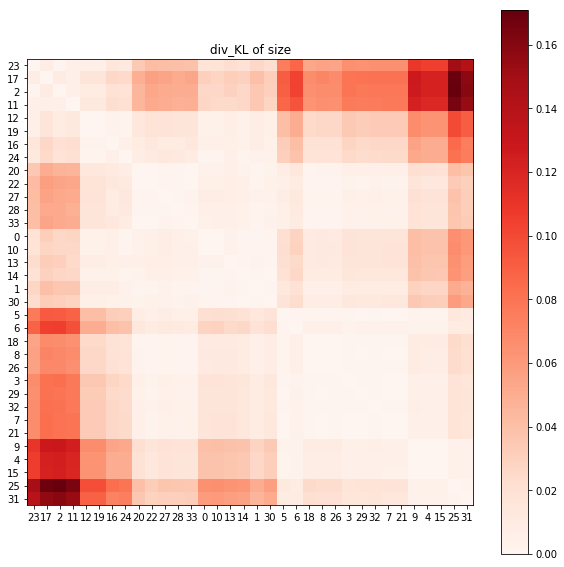

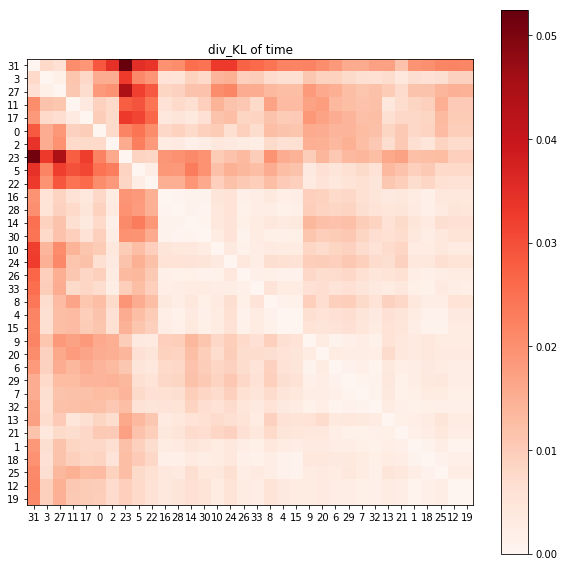

In [348]:
import scipy.stats as sc
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

taille = len(listeVideo)

divKLTaille = [[0 for x in range(taille)] for y in range(taille)]
divKLTaille2 = [[0 for x in range(taille)] for y in range(taille)]

for i in range(taille):
    for j in range(taille):
        divKLTaille[i][j] = sc.entropy(pk=listeVideo[i]['size'],
                                       qk=listeVideo[j]['size'])

indiceTaille = dendrogram(linkage(divKLTaille, 'ward'), no_plot=True)['leaves']

for i in range(taille):
    for j in range(taille):
        divKLTaille2[i][j] = sc.entropy(pk=listeVideo[indiceTaille[i]]['size'],
                                        qk=listeVideo[indiceTaille[j]]['size'])
        
plt.subplots(figsize=(10, 10))
plt.imshow(divKLTaille2,cmap='Reds',interpolation='nearest')
plt.title('div_KL of size')
plt.xticks(range(len(indiceTaille)),indiceTaille)
plt.yticks(range(len(indiceTaille)), indiceTaille)
plt.colorbar()
plt.show()

divKLTemps = [[0 for x in range(taille)] for y in range(taille)]
divKLTemps2 = [[0 for x in range(taille)] for y in range(taille)]

for i in range(taille):
    for j in range(taille):
        divKLTemps[i][j] = sc.entropy(pk=listeVideo[i]['elapsedtime'],
                                      qk=listeVideo[j]['elapsedtime'])
        
indiceTemps = dendrogram(linkage(divKLTemps, 'ward'), no_plot=True)['leaves']

for i in range(taille):
    for j in range(taille):
        divKLTemps2[i][j] = sc.entropy(pk=listeVideo[indiceTemps[i]]['elapsedtime'],
                                       qk=listeVideo[indiceTemps[j]]['elapsedtime'])

        
plt.subplots(figsize=(10, 10))
plt.imshow(divKLTemps2,cmap='Reds',interpolation='nearest')
plt.title('div_KL of time')
plt.xticks(range(len(indiceTemps)),indiceTemps)
plt.yticks(range(len(indiceTemps)), indiceTemps)
plt.colorbar()
plt.show()

We need one mean to compare all the clustering we have done. What differency them?

<font size = 4><b> General function for transfering video i on video j </b></font>

--

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC, SVR
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestRegressor

def transfer(var,varexp1,varexp2,i,j,testSize,method):
    # where var is either 'size' or 'elapsedtime'
    # varexp1 & varexp2 two parameter of configuration
    # i is the number of the "learning" video
    # j is the video which will benefits from the learning of i
    # testSize is the size of the test dataset (70 for 70% of tests)
    # method is 'sv' for support vector, 'rf' for random forest, 'reg' for regression

    st = testSize/100
    
    # Split the targets into training/testing sets
    x_train, x_test, y_train, y_test = train_test_split(listeVideo[i][[var, varexp1,varexp2]], 
                                                        listeVideo[j][var], 
                                                        test_size= st, 
                                                        random_state=0)
    
    #choose the method
    if method == 'reg':
        clf = linear_model.LinearRegression()
        
    if method == 'rf':
        clf = RandomForestRegressor(n_estimators=20)
        
    if method == 'sv':
        clf = SVC(kernel='rbf', C=1e10, gamma=1e-8)
      
    # Apply the model to the training datasets and predict for the testing dataset
    y_pred = clf.fit(x_train, y_train).predict(x_test)
    
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))

    # Then we plot the prediction vs the reality
    plt.scatter(x_test['size'], y_test,  color='black')
    plt.scatter(x_test['size'], y_pred,  color='red')
    plt.xticks(())
    plt.yticks(())
    plt.show()

We test the function on tranfer with video 1 and video 5

svm
Variance score: 0.63


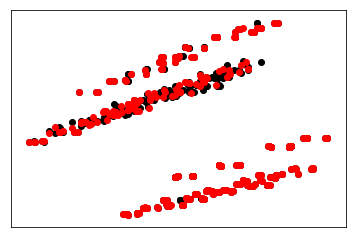

reg
Variance score: 0.94


/usr/local/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


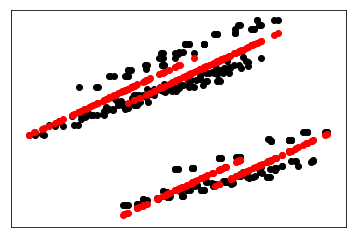

random forest
Variance score: 0.97


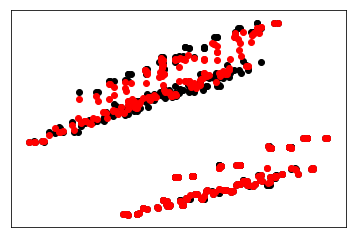

In [11]:
print("svm")
transfer('size','no_mbtree','no_cabac',1,6,30,'sv')
print("reg")
transfer('size','no_mbtree','no_cabac',1,6,30,'reg')
print("random forest")
transfer('size','no_mbtree','no_cabac',1,6,30,'rf')

<font size = 4><b> Comparison of simple learning vs tranfer learning </b></font>

--

In [12]:
# Tracer évolution r2 des modèles selon taille échantillon avec learning simple à partir de random forest sur le temps
# Learning simple à partir de random forest sur la taille
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas
from matplotlib import pyplot as plt

source = listeVideo[0]

r2_learning_double = []
for aux in listeVideo:
    x = np.asarray(source[['elapsedtime','H264','no_8x8dct','no_asm',
                           'no_cabac','no_deblock','no_fast_pskip',
                           'no_mbtree','no_mixed_refs','no_weightb',
                           'rc_lookahead','ref','usertime','systemtime']])
    y = np.ravel(aux['elapsedtime'])

    r2 = []
    for i in range(1,65):
        pct_test = 1-16*i/len(y)
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=pct_test, random_state=42)
        clf = RandomForestRegressor()
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        r2.append(r2_score(y_test, prediction))

    r2_learning_double.append(r2)

r2_learning_simple = []
for aux in listeVideo:
    x = np.asarray(aux[['H264','no_8x8dct','no_asm','no_cabac','no_deblock',
             'no_fast_pskip','no_mbtree','no_mixed_refs',
             'no_weightb','rc_lookahead','ref','usertime','systemtime']])
    y = np.ravel(aux[['elapsedtime']])

    r2 = []
    for i in range(1,65):
        pct_test=1-16*i/len(y)
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=pct_test, random_state=42)
        clf = RandomForestRegressor()
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        r2.append(r2_score(y_test, prediction))

    r2_learning_simple.append(r2)

# Pour chaque vidéo, on regarde le r2 avec une taille d'échantillon différente.
data_simple = pandas.DataFrame(data=r2_learning_simple)
# Pour chaque vidéo, on regarde le r2 avec une taille d'échantillon différente.
data_double = pandas.DataFrame(data=r2_learning_double)

<font size = 4><b> Curves of r2_score of prevision in fonction of the training dataset length</b></font>

--

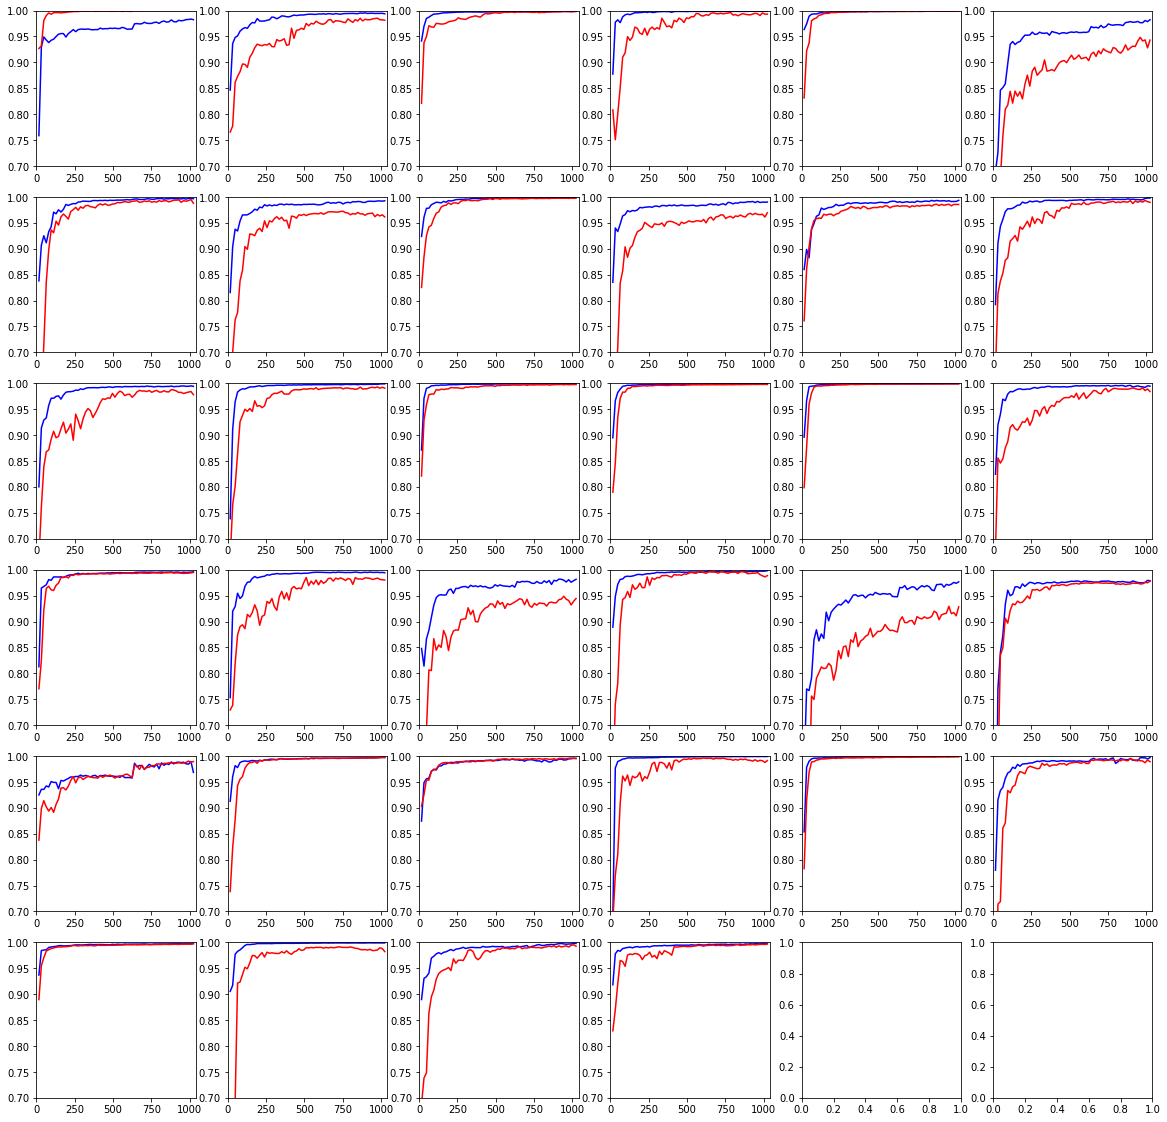

In [13]:
import numpy as np
from matplotlib import pyplot as plt

taille = 6
plt.subplots(nrows=taille,ncols=taille,figsize=(20, 20))

for i in range(taille):
    for j in range(taille):
        plt.subplot(taille,taille,taille*i+j+1)
        x1=np.asarray(data_simple[taille*i+j:taille*i+j+1])
        x2=np.asarray(data_double[taille*i+j:taille*i+j+1])
        if taille*i+j<34:
            plt.axis([0,1040,0.7,1])
            plt.plot(range(16,1040,16),x1[0],c="blue")
            plt.plot(range(16,1040,16),x2[0],c="red")
plt.show()

- Red : tranfer + learning
- Blue : learning

<font size = 4><b> Group of configurations</b></font>

--

In [14]:
classement_general={}
for j in range(len(listeVideo)):
    classement = {}
    liste_temps=listeVideo[j]["elapsedtime"]
    for i in range(len(listeVideo[j]["elapsedtime"])):
        classement[listeVideo[j]["configurationID"][i]]=listeVideo[j]["elapsedtime"][i]
    classement=sorted(classement.items(), key=lambda t:t[1])
    classement_general[j]=classement
len(classement_general)

34

In [15]:
tableau={}
for c in range(1,len(listeVideo[0])+1):
    conf1={}
    for i in range(len(listeVideo)):
        classement_config=0
        for j in range(len(listeVideo[0])):
            if classement_general[i][j][0]==c:
                classement_config = classement_general[i].index(classement_general[i][j])
                
        conf1[i+1] = classement_config
    tableau[c]=conf1

<font size = 4><b> Dataframe of ordering configurations</b></font>

--

In [16]:
tableau2=pandas.DataFrame(data=tableau)
tableau_joli=tableau2.transpose()
tableau_joli
#se lit comme tel : la première configuration est la deuxième moins efficace pour la première vidéo

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
1,1151,953,836,855,907,1151,898,1058,950,1092,...,1151,892,905,722,902,1098,923,741,986,959
2,445,386,412,484,513,481,333,355,544,413,...,441,484,440,461,448,381,464,463,405,442
3,520,507,637,466,443,459,386,291,495,338,...,680,452,500,447,474,370,499,313,409,527
4,320,134,361,136,119,156,191,126,74,144,...,348,190,215,168,168,165,194,156,173,201
5,1108,1108,1138,1055,1046,961,1053,1090,1054,1025,...,1104,1038,1103,1109,1141,1049,1131,989,1048,1119
6,325,216,83,229,311,310,244,278,255,280,...,63,223,253,224,294,281,181,285,208,153
7,383,626,789,783,888,747,678,714,899,751,...,589,851,854,697,852,670,866,686,763,708
8,746,846,757,800,638,585,786,812,600,794,...,837,575,693,851,720,833,731,815,764,729
9,938,854,997,718,836,608,640,687,878,600,...,1026,790,875,666,881,551,912,631,693,900
10,1129,1075,1011,1088,1092,1117,1114,1113,1125,1110,...,1129,1088,1035,1048,1013,1099,1038,1024,1107,1028


In [253]:
groupe={}
for i in range(1,35):
    groupe[i]=tableau_joli.loc[tableau_joli[i]<10].index
groupe 

{1: Int64Index([29, 44, 163, 506, 544, 548, 636, 720, 869, 975], dtype='int64'),
 2: Int64Index([35, 219, 262, 358, 436, 608, 687, 958, 1088, 1130], dtype='int64'),
 3: Int64Index([163, 199, 256, 290, 720, 892, 903, 1051, 1099, 1107], dtype='int64'),
 4: Int64Index([100, 155, 232, 358, 537, 574, 608, 651, 781, 995], dtype='int64'),
 5: Int64Index([102, 131, 257, 428, 580, 608, 611, 643, 651, 876], dtype='int64'),
 6: Int64Index([57, 80, 123, 313, 356, 424, 490, 587, 866, 908], dtype='int64'),
 7: Int64Index([57, 100, 123, 133, 465, 908, 918, 1088, 1130, 1131], dtype='int64'),
 8: Int64Index([48, 80, 102, 441, 535, 608, 781, 866, 918, 1131], dtype='int64'),
 9: Int64Index([421, 428, 491, 535, 537, 541, 651, 744, 753, 781], dtype='int64'),
 10: Int64Index([80, 123, 133, 156, 232, 306, 611, 908, 1088, 1130], dtype='int64'),
 11: Int64Index([56, 257, 340, 386, 449, 537, 580, 605, 608, 692], dtype='int64'),
 12: Int64Index([163, 238, 256, 571, 654, 736, 822, 869, 1053, 1099], dtype='int64')

<font size = 4><b> Top 10 configurations</b></font>

--

In [18]:
groupe_config={}
for i in (0,9):
    for j in range(1,35):
        l=[]
        for c in range(0,10):
            for k in range(1,35):
                if groupe[j][i]==groupe[k][c]:
                    if groupe[j][i] not in groupe_config.keys():
                        l.append(k)
                        groupe_config[groupe[j][i]]=l
                    else : 
                        groupe_config[groupe[j][i]].append(k)
for i in groupe_config:
    groupe_config[i]=set(groupe_config[i])
groupe_config

{29: {1},
 35: {2},
 39: {25},
 48: {8, 14},
 56: {11, 16, 19, 22, 27},
 57: {6, 7, 23, 33},
 76: {22, 26},
 80: {6, 8, 10, 26},
 88: {19, 22, 29, 32, 34},
 98: {26, 30},
 100: {4, 7, 24, 33},
 102: {5, 8, 13, 21, 28, 29, 34},
 133: {7, 10, 20, 26, 33},
 163: {1, 3, 12, 15, 17, 31},
 257: {5, 11, 16, 18, 27, 34},
 421: {9, 32},
 692: {11, 19, 24, 27, 34},
 716: {19},
 756: {13, 20, 27, 34},
 781: {4, 8, 9, 24},
 822: {12, 17, 25},
 839: {16, 22},
 876: {5, 16, 18, 24, 29},
 903: {3, 15, 31},
 908: {6, 7, 10, 32, 33},
 958: {2, 20, 24, 28},
 975: {1, 25},
 995: {4, 27, 28},
 996: {16, 18, 20, 21, 32},
 1019: {18},
 1088: {2, 7, 10, 13, 14, 21, 23, 26, 30},
 1099: {3, 12, 15},
 1107: {3},
 1129: {13, 14, 20, 21},
 1130: {2, 7, 10, 14},
 1131: {7, 8, 23, 32}}

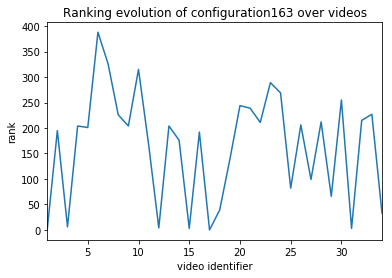

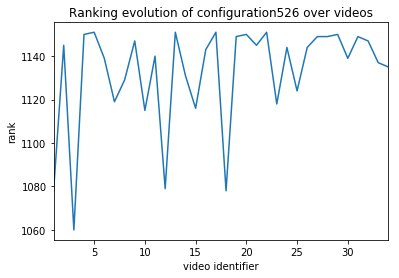

,count,mean,std,min,25%,50%,75%,max
count,1152.0,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,34.0,575.500000,97.350391,371.537326,514.899740,576.763455,634.119792,785.838542
std,0.0,316.972950,32.255185,302.668161,319.744578,325.190584,326.693594,284.705976
min,34.0,55.794118,24.475241,0.000000,10.500000,32.500000,66.250000,179.000000
25%,34.0,319.125000,72.920098,83.750000,242.687500,309.000000,364.875000,550.000000
50%,34.0,619.794118,97.778644,339.500000,539.250000,605.750000,687.625000,877.500000
75%,34.0,811.500000,119.328800,568.000000,723.250000,834.000000,898.500000,1023.000000
max,34.0,1133.176471,198.834664,1060.000000,1133.750000,1144.500000,1149.750000,1151.000000


In [346]:
rank_configs = tableau_joli.transpose().describe(percentiles=[.1, .25, .5, .75, .9]).transpose().query('min < 100')
(rank_configs['max'] - rank_configs['min']).argmax() # 1114
tableau_joli.transpose()[1114].argmax(), tableau_joli.transpose()[1114].describe()
#tableau_joli.transpose()[1114].plot()
#plt.show()

#(rank_configs['mean']).argmax()
#tableau_joli.transpose()[404].describe()
#rank_configs['std'].sort_values()
#(rank_configs['25%'] - rank_configs['75%']).sort_values() #.describe()
#(rank_configs['10%'] - rank_configs['90%']).sort_values()
(rank_configs['10%'] - rank_configs['50%']).sort_values()
#(rank_configs['max'] - rank_configs['min']).sort_values()

def rank_evolution(cid):
    tableau_joli.transpose()[cid].plot()
    plt.xlabel('video identifier')
    plt.ylabel('rank')
    plt.title("Ranking evolution of configuration" + str(cid) + " over videos")
    plt.savefig("rankingevo-c" + str(cid) + ".pdf", format="pdf", bbox_inches='tight')
    plt.show()
rank_evolution(163)
rank_evolution(tableau_joli.transpose().describe().transpose()['std'].argmin())
tableau_joli.transpose().describe().transpose().describe()

In [73]:
tableau_joli.transpose().describe().transpose().query('min == 0')['max'].argmax()

224

In [90]:
import scipy
tableau_joli.transpose()[224].argmax(), tableau_joli.transpose()[224].argmin()
tableau_joli.transpose()[224][6], tableau_joli.transpose()[224][31]
np.corrcoef(listeVideo[5]['elapsedtime'], listeVideo[30]['elapsedtime'])[0, 1], scipy.stats.spearmanr(listeVideo[5]['elapsedtime'], listeVideo[30]['elapsedtime'])

(0.69922320069986876,
 SpearmanrResult(correlation=0.72598608565366607, pvalue=3.3568142680227087e-189))

In [93]:
tableau_joli.transpose().describe().transpose().query('min < 10')['max'].argmax()

44

In [95]:
tableau_joli.transpose()[44].argmax(), tableau_joli.transpose()[44].argmin()
tableau_joli.transpose()[44][6], tableau_joli.transpose()[44][1]

(545, 5)

In [252]:
tableau_joli.transpose().describe(percentiles=[.05]).transpose()['5%'].argmin()
# tableau_joli.transpose()[1088].describe() (good for top 25%)
# tableau_joli.transpose()[163].describe() # configuration 163 (top 10%)
# tableau_joli.transpose()[580].describe() # configuration 580 (top 5%)
# tableau_joli.transpose().describe().transpose()['mean'].argmin()
# tableau_joli.transpose()[839].describe()
# tableau_joli.transpose().describe().transpose()['std'].argmax()
#tableau_joli.transpose()[419].describe()

1        707.65
2        305.90
3        329.25
4         92.85
5       1007.85
6        104.45
7        531.60
8        594.75
9        605.20
10       989.95
11        99.05
12       325.35
13       584.65
14      1029.75
15       257.45
16        46.25
17       112.40
18       669.50
19       511.60
20       919.85
21       405.85
22        64.15
23       503.05
24       717.85
25       556.75
26       916.70
27       891.60
28       539.20
29        45.05
30       939.35
         ...   
1123      97.85
1124      51.60
1125     101.90
1126     288.00
1127     486.90
1128      77.50
1129       8.30
1130       1.95
1131       7.65
1132     387.95
1133     295.25
1134     181.65
1135     860.30
1136     549.55
1137    1002.65
1138     343.25
1139    1002.90
1140     951.50
1141     386.85
1142     370.90
1143     306.10
1144     936.25
1145     102.60
1146     564.40
1147     589.55
1148     616.15
1149     121.35
1150     199.95
1151     625.45
1152      14.65
Name: 5%, dtype: float64

In [126]:
tableau_joli.transpose().describe().transpose().query('min == 0')['mean'].argmax()
#tableau_joli.transpose()[44].describe()
# tableau_joli.transpose()[163].describe()
tableau_joli.transpose()[224].describe()

count     34.000000
mean     178.264706
std      107.113168
min        0.000000
25%       97.750000
50%      200.000000
75%      229.000000
max      468.000000
Name: 224, dtype: float64

In [250]:
# video 2 and video 5
import pandas as pd 
(tableau_joli[3] - tableau_joli[6]).describe() # 3 because we are staring from 1 (so video 2)
# tableau_joli[3].index[tableau_joli[3] == 0]
# tableau_joli[3].argmin()
#tableau_joli[3].index[tableau_joli[3] < 10]
tableau_joli[3][256] - tableau_joli[6][256] 
# tableau_joli[3].nlargest(10)
#(abs(tableau_joli[3] - tableau_joli[15])).describe() # good Spearman correlation 
# tableau_joli[15][tableau_joli[3].argmin()], tableau_joli[3][tableau_joli[15].argmin()]  
# tableau_joli[15][tableau_joli[3].index[tableau_joli[3] == 3]]

### eg top 10 configurations of video 2 vs video 14
### we start at 1, grrrr TODO
def diff_rank_top(v1ID, v2ID):
    rv1ID = v1ID + 1 # because we start at 1, grrrr TODO
    rv2ID = v2ID + 1 
    rankBy = tableau_joli.sort_values(by=rv1ID, axis=0)
    m = pd.concat([rankBy[rv1ID][:10], rankBy[rv2ID][:10]], axis=1)
    m.columns = ['video ' + str(v1ID), 'video ' + str(v2ID)]
    return m
diff_rank_top(2, 5)
#diff_rank_top(14, 2)

,video 2,video 5
256,0,372
1107,1,406
1099,2,381
1051,3,370
720,4,298
199,5,503
163,6,388
892,7,431
290,8,248
903,9,368


In [327]:
tableau_joli.transpose().describe().transpose().sort_values(by="std")

,count,mean,std,min,25%,50%,75%,max
526,34.0,1132.411765,24.475241,1060.0,1125.25,1143.5,1149.00,1151.0
404,34.0,1133.176471,25.090709,1052.0,1132.50,1144.0,1147.00,1151.0
62,34.0,1112.705882,27.536785,1047.0,1100.25,1114.5,1136.00,1150.0
444,34.0,1120.470588,27.736023,1037.0,1115.00,1131.5,1136.75,1147.0
515,34.0,1130.911765,27.915856,1059.0,1133.75,1144.0,1147.75,1150.0
297,34.0,1129.323529,29.143033,1047.0,1119.75,1143.0,1148.00,1151.0
305,34.0,1128.970588,29.405715,1042.0,1131.75,1141.5,1145.75,1151.0
411,34.0,1111.382353,29.416564,1037.0,1097.00,1112.5,1136.75,1145.0
564,34.0,1114.588235,29.993047,1044.0,1108.75,1129.5,1134.00,1147.0
344,34.0,1110.588235,30.397486,1034.0,1100.25,1123.0,1130.50,1143.0
